# Climatologie et au lit
### *Orkaëlle*

## Initialisation

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import utiles
import fct_climatologie as fct

Loading raw datas

In [3]:
utiles.loading_raw()

Datas already downloaded.
Datas are successfully loaded.



Création du dataframe

In [4]:
df = fct.creation_df()
df.head(10)

Import des données 1995 -> 2019...
OK.

Gestion des doublons...
OK.

Gestion des manquants...
OK.

Finalisation...
OK.

Traitement terminé.


,Date,City,Country,Region,AvgTemperature,month,year
0,1995-01-01,Abidjan,Ivory Coast,Africa,28.111111,1,1995
1,1995-01-02,Abidjan,Ivory Coast,Africa,27.944444,1,1995
2,1995-01-03,Abidjan,Ivory Coast,Africa,27.222222,1,1995
3,1995-01-04,Abidjan,Ivory Coast,Africa,28.500000,1,1995
4,1995-01-05,Abidjan,Ivory Coast,Africa,28.555556,1,1995
5,1995-01-06,Abidjan,Ivory Coast,Africa,28.944444,1,1995
6,1995-01-07,Abidjan,Ivory Coast,Africa,28.055556,1,1995
7,1995-01-08,Abidjan,Ivory Coast,Africa,27.388889,1,1995
8,1995-01-09,Abidjan,Ivory Coast,Africa,26.500000,1,1995
9,1995-01-10,Abidjan,Ivory Coast,Africa,27.166667,1,1995


## Requêtes

### Requête 1 - Les températures moyennes françaises de 1995 à 2019

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [6]:
df_rq1 = df.loc[df['Country'] == 'France']

In [7]:
df_plot = df_rq1.groupby(['year']).mean().reset_index()
df_plot.head()

,year,AvgTemperature,month
0,1995,13.086758,6.526027
1,1996,12.285595,6.513661
2,1997,13.819254,6.526027
3,1998,11.395129,6.526027
4,1999,13.151370,6.526027


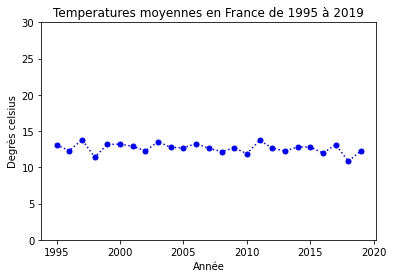

In [8]:
x = df_plot['year']
y = df_plot['AvgTemperature']

plt.plot(x, y, linestyle = ':', marker = 'o', color = 'blue', markersize = 5)
plt.title('Temperatures moyennes en France de 1995 à 2019')
plt.ylabel('Degrès celsius')
plt.xlabel('Année')

axes = plt.gca()
axes.set_ylim(0, 30)

plt.show()

### Requête 2 - L'évolution moyenne de la temperature chaque mois de l'année (sur toutes les années donc) de chaque région du globe (à l'aide de subplots, soit plusieurs diagramme sur un seul affichage) 

In [9]:
df_rq2 = df

In [10]:
df_plot = df_rq2.groupby(['Region','month']).mean().reset_index()

In [11]:
regions = df_plot['Region'].drop_duplicates().tolist()


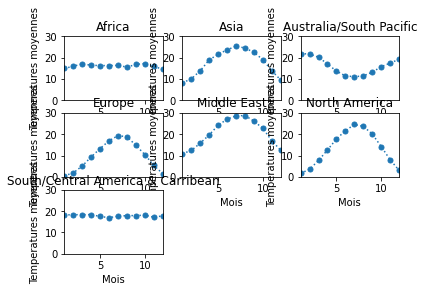

In [12]:
for r in regions :
    df_subplot = df_plot.loc[df_plot['Region'] == r]
    i = regions.index(r)+1

    x = df_subplot['month']
    y = df_subplot['AvgTemperature']

    plt.subplot(3,3,i)
    plt.plot(x, y, linestyle = ':', marker = 'o', markersize = 5)
    plt.title(r)
    plt.ylabel('Temperatures moyennes')
    plt.xlabel('Mois')

    axes = plt.gca()
    axes.set_ylim(0, 30)
    axes.set_xlim(1, 12)   

plt.show()

### Requête 3 - Le classement graphique des pays les plus chauds au monde

In [132]:
df_rq3 = df[['Country','AvgTemperature']]

In [133]:
df_hot = df_rq3.groupby(['Country']).mean().reset_index().nlargest(10, 'AvgTemperature')

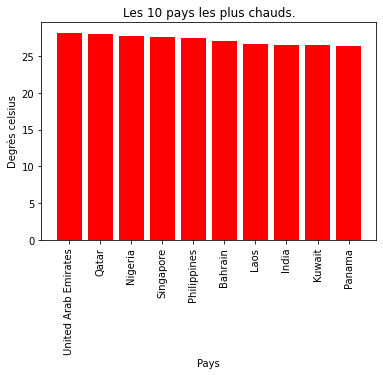

In [136]:
x = df_hot['Country']
y = df_hot['AvgTemperature']

plt.bar(x, y, linestyle = ':', color = 'red')
plt.title('Les 10 pays les plus chauds.')
plt.ylabel('Degrès celsius')
plt.xlabel('Pays')

plt.xticks(rotation = 'vertical')

plt.show()

### Requête 4 - Le classement graphique des pays les plus froids au monde

In [137]:
df_rq4 = df[['Country','AvgTemperature']]

In [138]:
df_cold = df_rq4.groupby(['Country']).mean().reset_index().nsmallest(10, 'AvgTemperature')

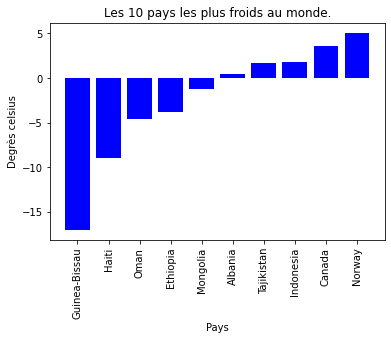

In [139]:
x = df_cold['Country']
y = df_cold['AvgTemperature']

plt.bar(x, y, linestyle = ':', color = 'blue')
plt.title('Les 10 pays les plus froids au monde.')
plt.ylabel('Degrès celsius')
plt.xlabel('Pays')

plt.xticks(rotation = 'vertical')

plt.show()

### Requête 5 - L'évolution des températures entre le pays le plus chaud et le pays le plus froid de 1995 à 2019 sur un même graphique

In [140]:
df_rq5 = df[['Country','year','AvgTemperature']]

In [141]:
df_hot = df_rq5.loc[df_rq5['Country'].isin(df_hot['Country'])].groupby(['year']).mean().reset_index()
df_cold = df_rq5.loc[df_rq5['Country'].isin(df_cold['Country'])].groupby(['year']).mean().reset_index()

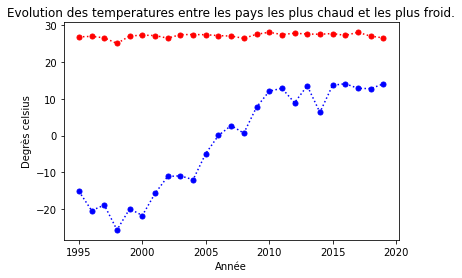

In [142]:
x = df_hot['year']

y1 = df_hot['AvgTemperature']
y2 = df_cold['AvgTemperature']

plt.plot(x, y1, linestyle = ':', marker = 'o', color = 'red', markersize = 5)
plt.plot(x, y2, linestyle = ':', marker = 'o', color = 'blue', markersize = 5)
plt.title('Evolution des temperatures entre les pays les plus chaud et les plus froid.')
plt.ylabel('Degrès celsius')
plt.xlabel('Année')

plt.show()

### Requête 6 - L'évolution de la température moyenne de la ville de Paris.

In [143]:
df_rq6 = df.loc[df['City'] == 'Paris']

In [144]:
df_rq6 = df_rq6[['year','AvgTemperature']].groupby(['year']).mean().reset_index()

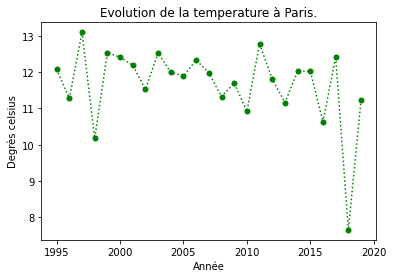

In [145]:
x = df_rq6['year']
y = df_rq6['AvgTemperature']

plt.plot(x, y, linestyle = ':', marker = 'o', color = 'green', markersize = 5)
plt.title('Evolution de la temperature à Paris.')
plt.ylabel('Degrès celsius')
plt.xlabel('Année')

plt.show()

### Requête 7 - La température moyenne de chaque pays sur une carte sur la période 2010-2019

In [146]:
df_rq7 = df.loc[df['year'] >= 2010]

In [147]:
df_rq7 = df_rq7[['Country','AvgTemperature']].groupby(['Country']).mean().reset_index()